In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train=pd.read_csv("/content/train.csv")
df_test=pd.read_csv("/content/test.csv")

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11791 entries, 0 to 11790
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                11791 non-null  int64  
 1   MonthlyCharges            11791 non-null  float64
 2   TotalCharges              11791 non-null  float64
 3   SubscriptionType          11791 non-null  object 
 4   PaymentMethod             11791 non-null  object 
 5   PaperlessBilling          11791 non-null  object 
 6   ContentType               11791 non-null  object 
 7   MultiDeviceAccess         11791 non-null  object 
 8   DeviceRegistered          11791 non-null  object 
 9   ViewingHoursPerWeek       11791 non-null  float64
 10  AverageViewingDuration    11791 non-null  float64
 11  ContentDownloadsPerMonth  11791 non-null  int64  
 12  GenrePreference           11791 non-null  object 
 13  UserRating                11790 non-null  float64
 14  Suppor

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11924 entries, 0 to 11923
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                11924 non-null  int64  
 1   MonthlyCharges            11924 non-null  float64
 2   TotalCharges              11924 non-null  float64
 3   SubscriptionType          11924 non-null  object 
 4   PaymentMethod             11924 non-null  object 
 5   PaperlessBilling          11924 non-null  object 
 6   ContentType               11924 non-null  object 
 7   MultiDeviceAccess         11924 non-null  object 
 8   DeviceRegistered          11924 non-null  object 
 9   ViewingHoursPerWeek       11924 non-null  float64
 10  AverageViewingDuration    11924 non-null  float64
 11  ContentDownloadsPerMonth  11924 non-null  int64  
 12  GenrePreference           11924 non-null  object 
 13  UserRating                11924 non-null  float64
 14  Suppor

In [7]:
df_train.isnull().sum(),df_test.isnull().sum()

(AccountAge                  0
 MonthlyCharges              0
 TotalCharges                0
 SubscriptionType            0
 PaymentMethod               0
 PaperlessBilling            0
 ContentType                 0
 MultiDeviceAccess           0
 DeviceRegistered            0
 ViewingHoursPerWeek         0
 AverageViewingDuration      0
 ContentDownloadsPerMonth    0
 GenrePreference             0
 UserRating                  1
 SupportTicketsPerMonth      1
 Gender                      1
 WatchlistSize               1
 ParentalControl             1
 SubtitlesEnabled            1
 CustomerID                  1
 Churn                       1
 dtype: int64,
 AccountAge                  0
 MonthlyCharges              0
 TotalCharges                0
 SubscriptionType            0
 PaymentMethod               0
 PaperlessBilling            0
 ContentType                 0
 MultiDeviceAccess           0
 DeviceRegistered            0
 ViewingHoursPerWeek         0
 AverageViewingDuration 

In [8]:
df_train.head(3)

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4.0,Male,3.0,No,No,CB6SXPNVZA,0.0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8.0,Male,23.0,No,Yes,S7R2G87O09,0.0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6.0,Male,1.0,Yes,Yes,EASDC20BDT,0.0


In [9]:
df_train= df_train.drop(['CustomerID'],axis =1)
df_test= df_test.drop(['CustomerID'],axis =1)

# Exploratory Data Analysis

In [10]:
numerical_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df_train.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumerical Columns:")
print(numerical_columns)
print(f"\nTotal number of numerical columns: {len(numerical_columns)}")

print("\nCategorical Columns:")
print(categorical_columns)
print(f"\nTotal number of categorical columns: {len(categorical_columns)}")


Numerical Columns:
['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize', 'Churn']

Total number of numerical columns: 10

Categorical Columns:
['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

Total number of categorical columns: 10


## Numerical Column Analysis

In [11]:
df_train[numerical_columns].describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,11791.000000,11791.000000,11791.000000,11791.000000,11791.000000,11791.000000,11790.000000,11790.000000,11790.000000,11790.000000
mean,59.512849,12.493218,742.779480,20.594555,92.531546,24.494445,3.007034,4.487786,12.039186,0.178287
std,34.569304,4.309666,524.957460,11.270217,50.550978,14.409247,1.153276,2.867648,7.223818,0.382770
min,1.000000,4.991317,5.126487,1.004939,5.017352,0.000000,1.000007,0.000000,0.000000,0.000000
25%,29.000000,8.731219,323.107355,10.808014,48.587010,12.000000,2.013413,2.000000,6.000000,0.000000
50%,59.000000,12.541916,635.811732,20.751222,93.049924,25.000000,3.021034,4.000000,12.000000,0.000000
75%,90.000000,16.151581,1082.150117,30.288111,136.068840,37.000000,3.998086,7.000000,18.000000,0.000000
max,119.000000,19.988562,2355.106099,39.998560,179.996645,49.000000,4.999821,9.000000,24.000000,1.000000


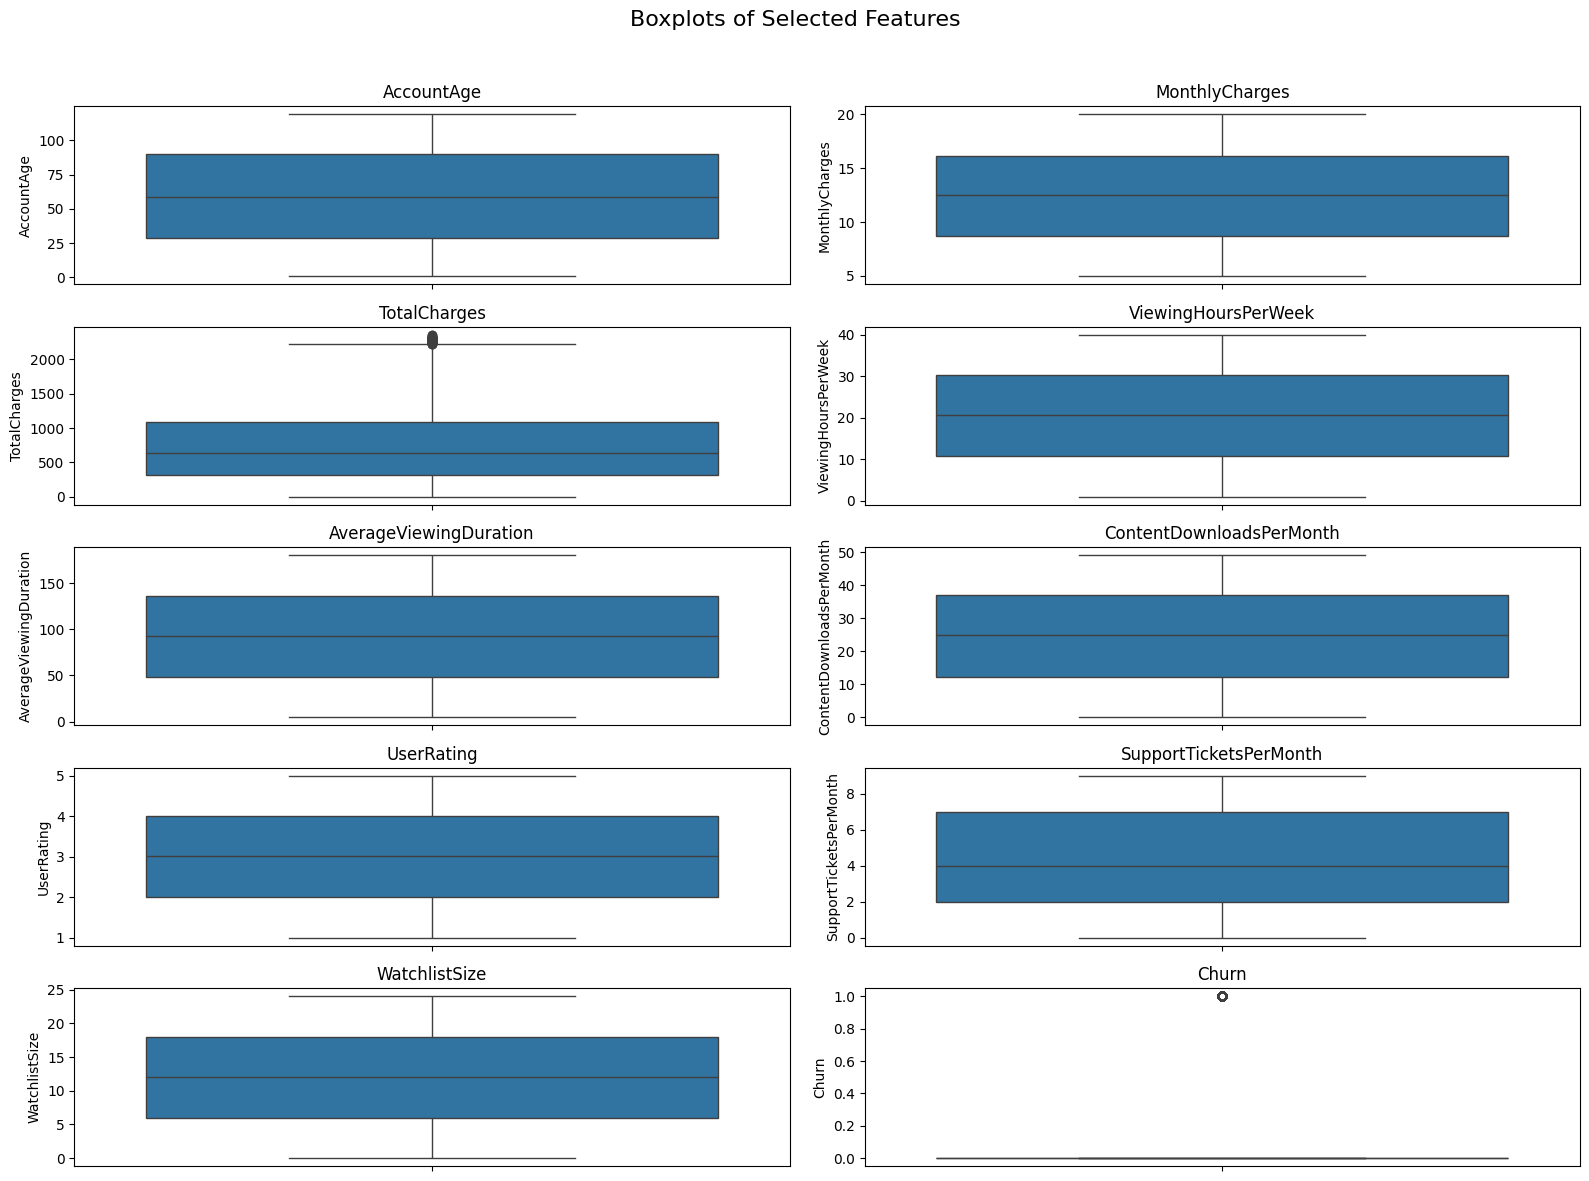

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 12))
fig.suptitle('Boxplots of Selected Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each feature
for i, col in enumerate(df_train[numerical_columns]):
    sns.boxplot(y=df_train[col], ax=axes[i])  # Use only one column here
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize']

In [14]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Cleaned data
df_train_clean = remove_outliers_iqr(df_train, features)

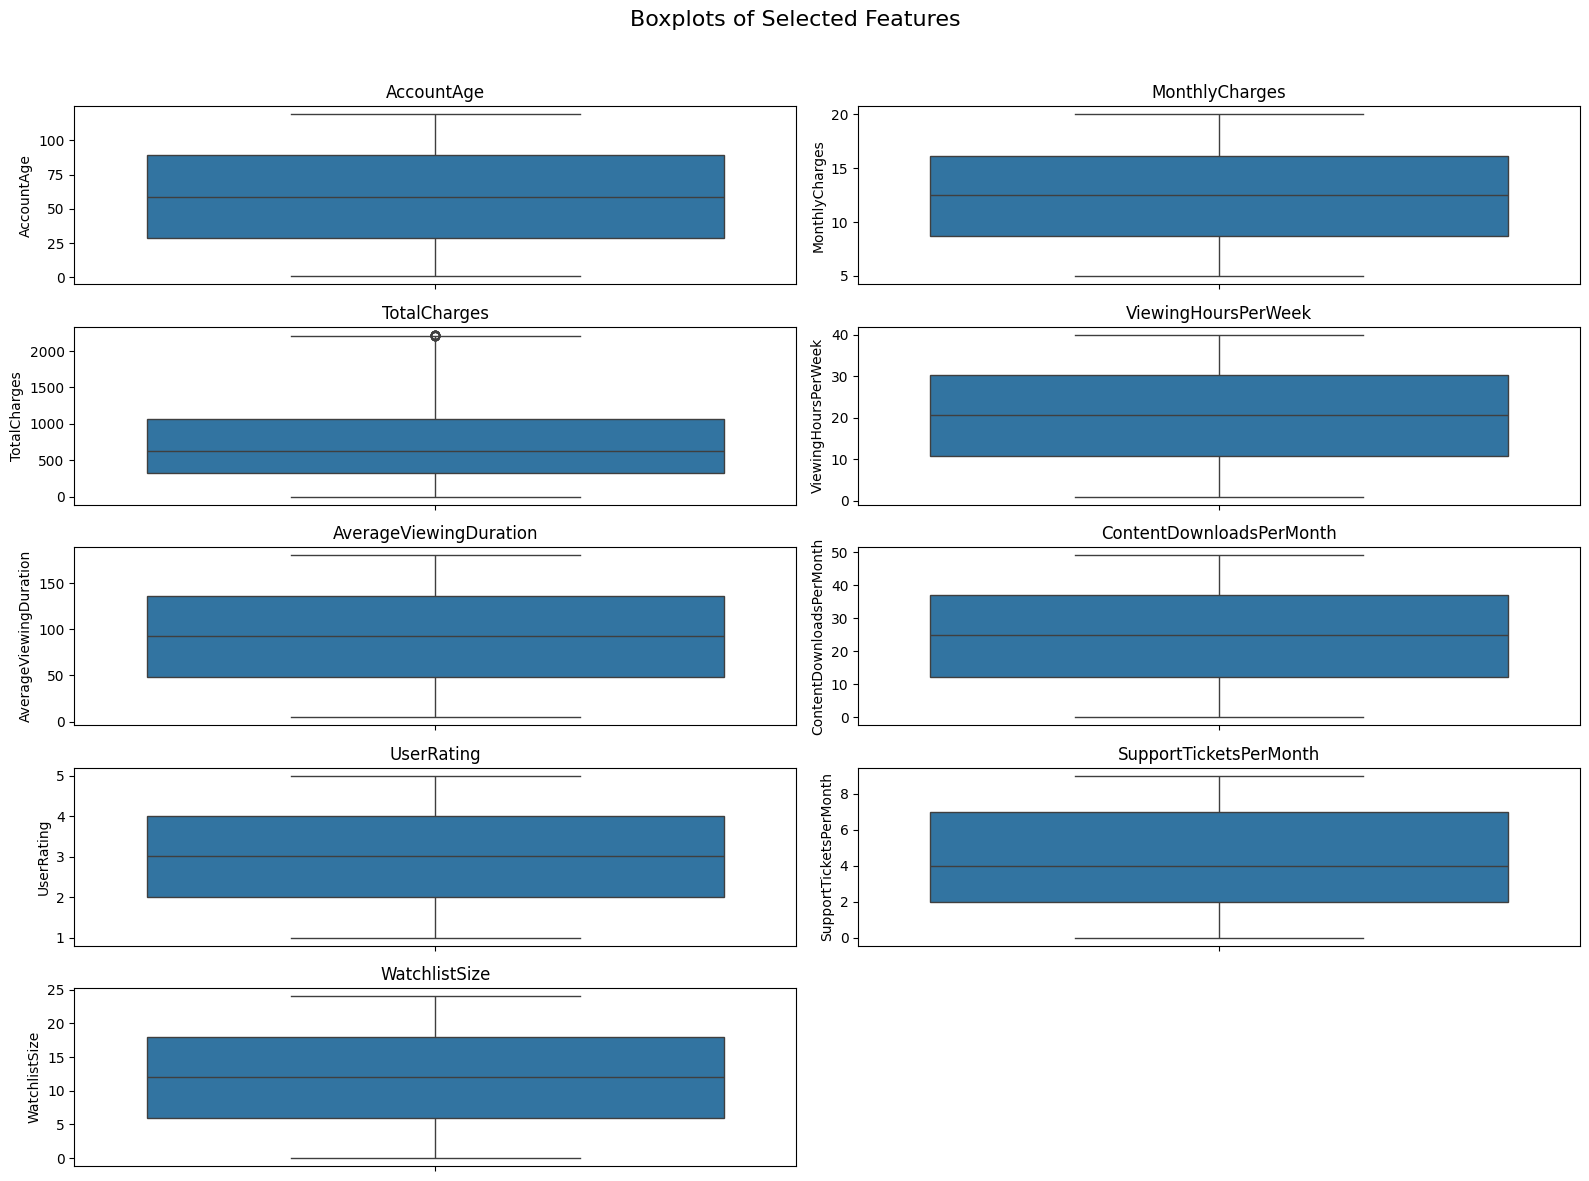

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 12))
fig.suptitle('Boxplots of Selected Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each feature
for i, col in enumerate(features):
    sns.boxplot(y=df_train_clean[col], ax=axes[i])
    axes[i].set_title(col)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

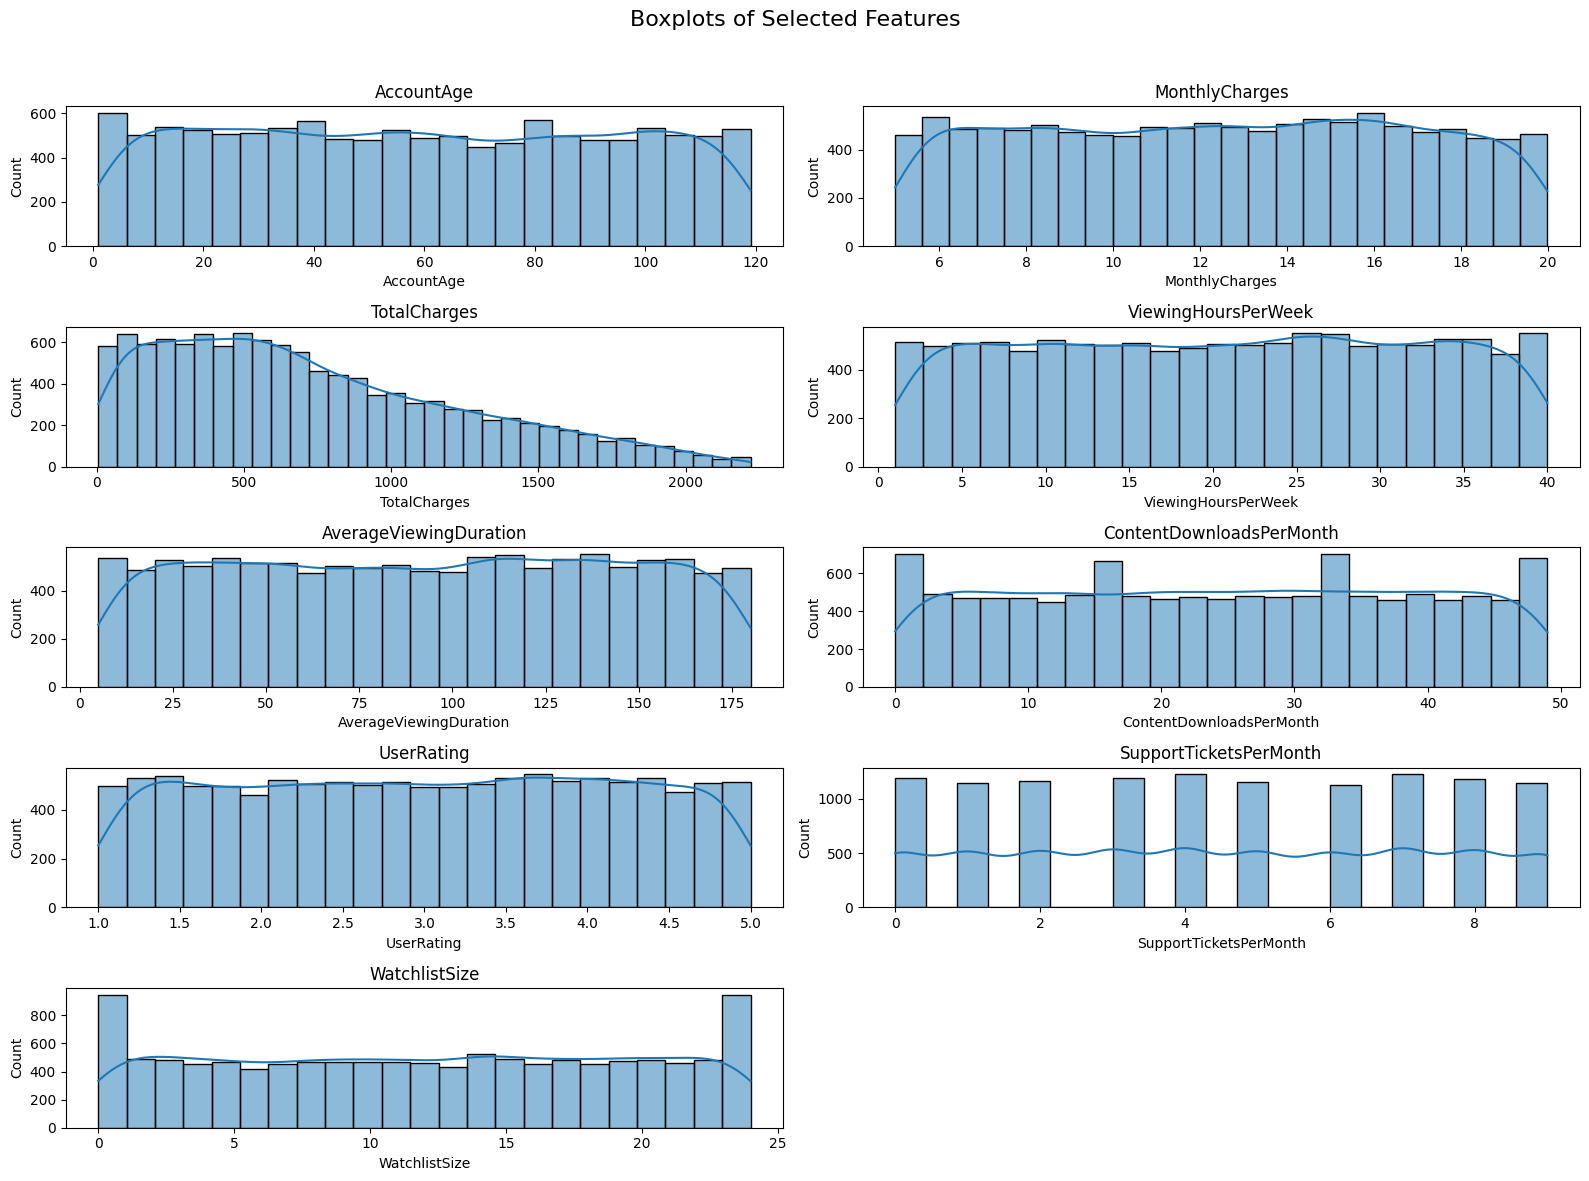

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 12))
fig.suptitle('Boxplots of Selected Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each feature
for i, col in enumerate(features):
    sns.histplot(x=df_train_clean[col],kde=True, ax=axes[i])
    axes[i].set_title(col)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

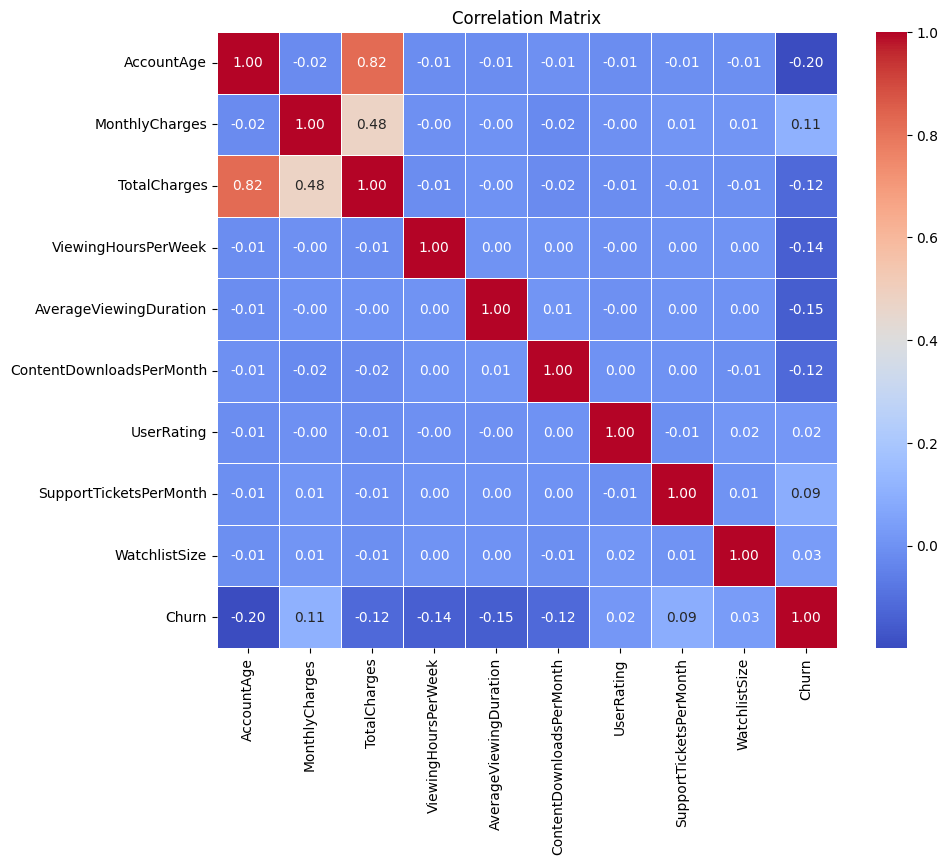

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train_clean[features + ['Churn']].corr(), annot=True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [18]:
sns.pairplot(df_train_clean[features + ['Churn']], hue='Churn', diag_kind='kde', plot_kws={'alpha':0.6})
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Observation

- **Outlier Detection:**  
  - Outliers were identified using a **box plot**.  
  - These were handled using the **Interquartile Range (IQR) method**.

- **Distribution of Features:**  
  - Histograms indicate that most numerical features follow an **approximately bell-shaped distribution**.

- **Correlation Analysis:**  
  - Weak positive correlations observed:  
    - `MonthlyCharges` with other variables (≈ **0.10** and **0.08**)  
    - `SupportTicket` with `WatchlistSize` (≈ **0.02**)  
  - All other numerical features show **negative correlations** with each other.

- **Pair Plot:**  
  - Visualizes scatter patterns between the numerical variables, confirming weak relationships.

---


## Categorical Features Analysis

In [19]:
for col in categorical_columns:
    print(col, "-->", df_train_clean[col].unique())

SubscriptionType --> ['Premium' 'Basic' 'Standard']
PaymentMethod --> ['Mailed check' 'Credit card' 'Electronic check' 'Bank transfer']
PaperlessBilling --> ['No' 'Yes']
ContentType --> ['Both' 'Movies' 'TV Shows']
MultiDeviceAccess --> ['No' 'Yes']
DeviceRegistered --> ['Mobile' 'Tablet' 'Computer' 'TV']
GenrePreference --> ['Sci-Fi' 'Action' 'Fantasy' 'Drama' 'Comedy']
Gender --> ['Male' 'Female']
ParentalControl --> ['No' 'Yes']
SubtitlesEnabled --> ['No' 'Yes']


/tmp/ipython-input-4252042925.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_clean[col], palette="viridis")
/tmp/ipython-input-4252042925.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_clean[col], palette="viridis")
/tmp/ipython-input-4252042925.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train_clean[col], palette="viridis")
/tmp/ipython-input-4252042925.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable 

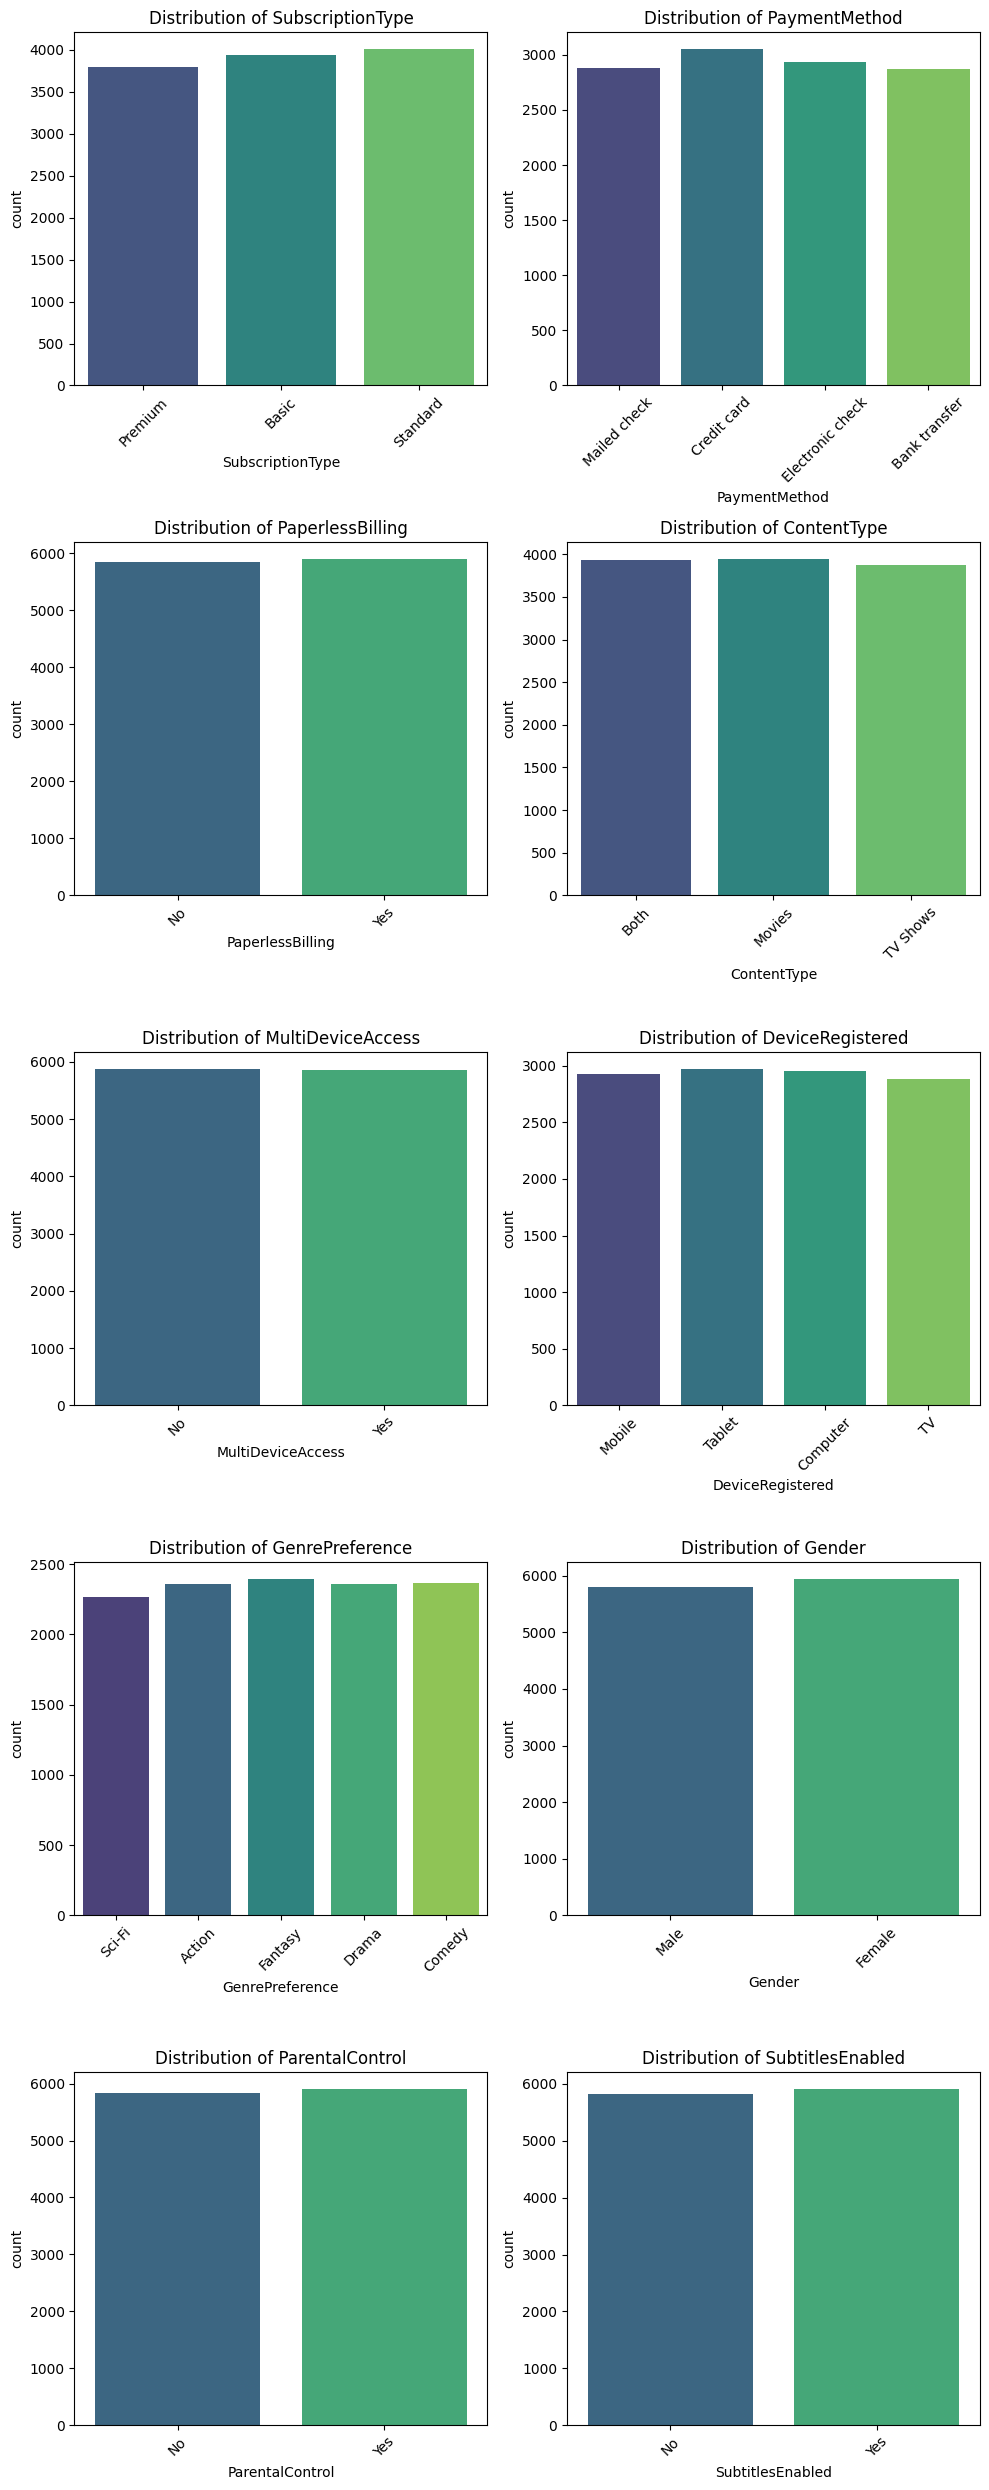

In [20]:
import math
n_features = len(categorical_columns)
ncols = 2  # You can adjust the number of columns here
nrows = math.ceil(n_features / ncols)  # Calculate rows needed to fit all features

# Plot the countplot for each categorical feature
plt.figure(figsize=(10, nrows * 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(nrows, ncols, i)  # Create subplots with dynamic grid size
    sns.countplot(x=df_train_clean[col], palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

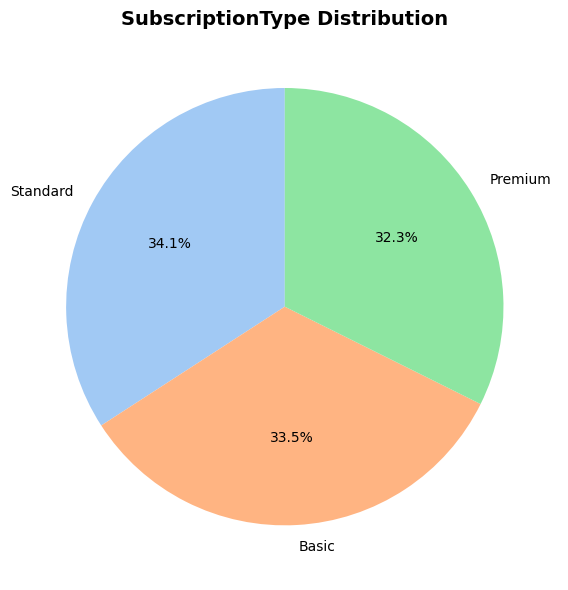

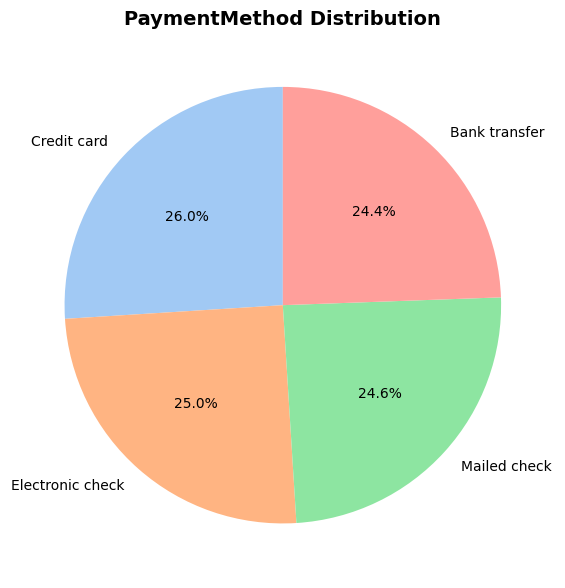

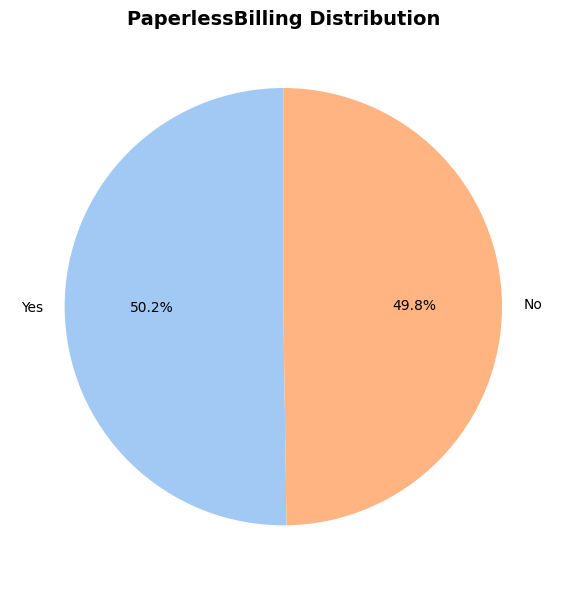

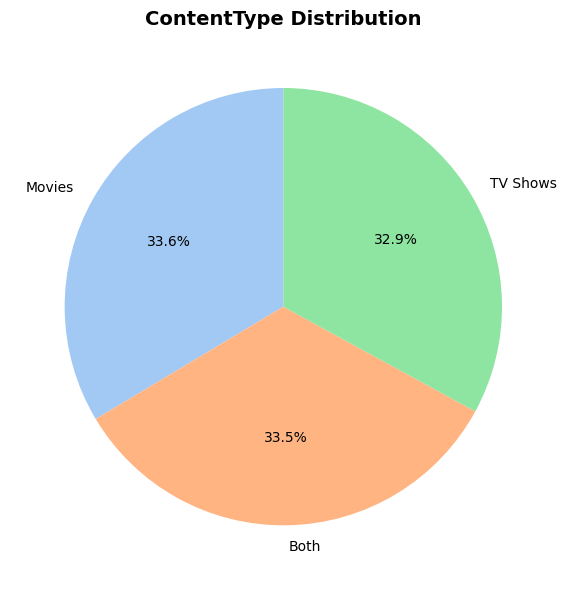

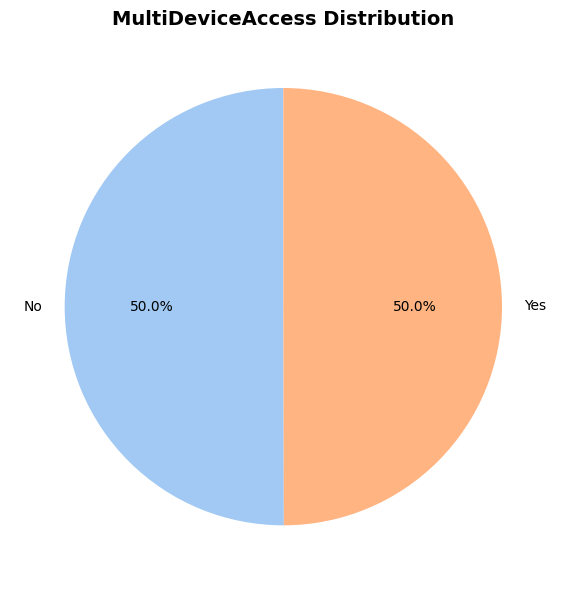

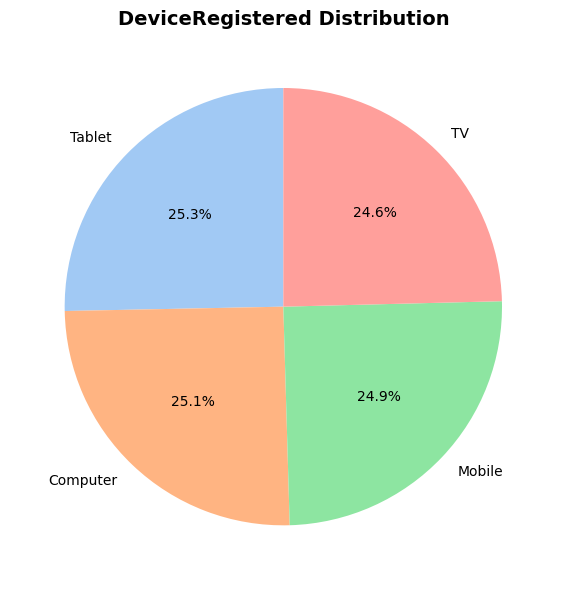

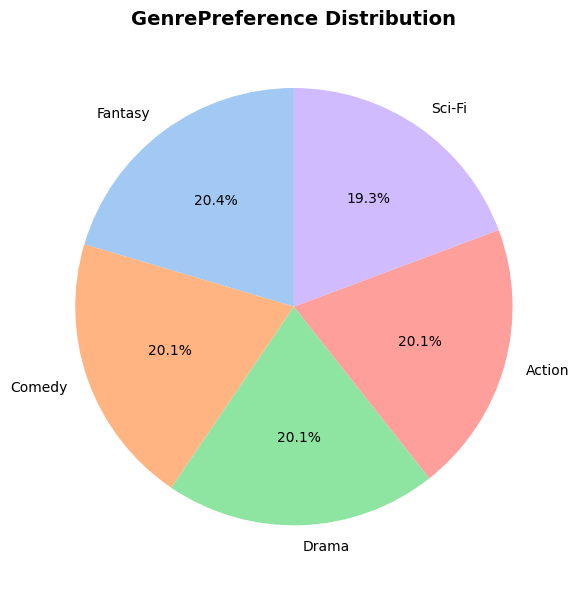

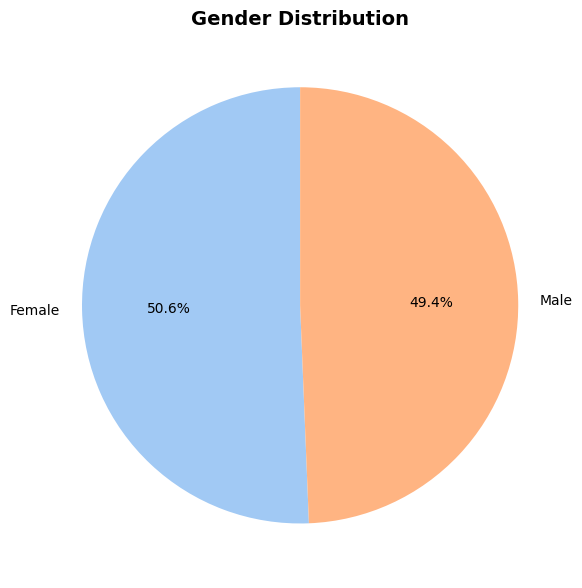

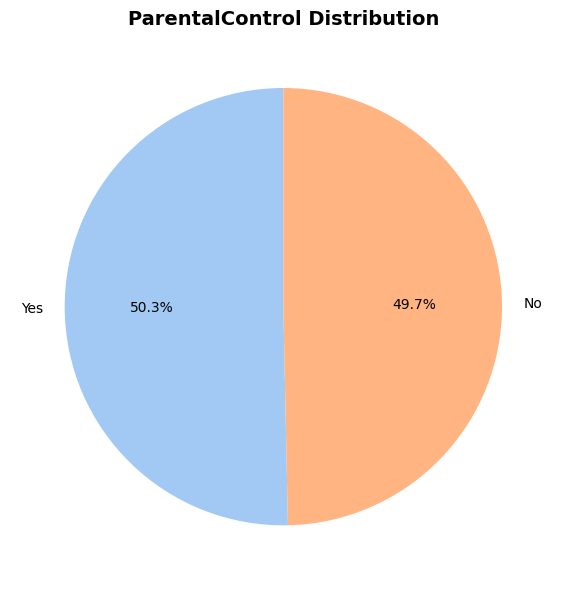

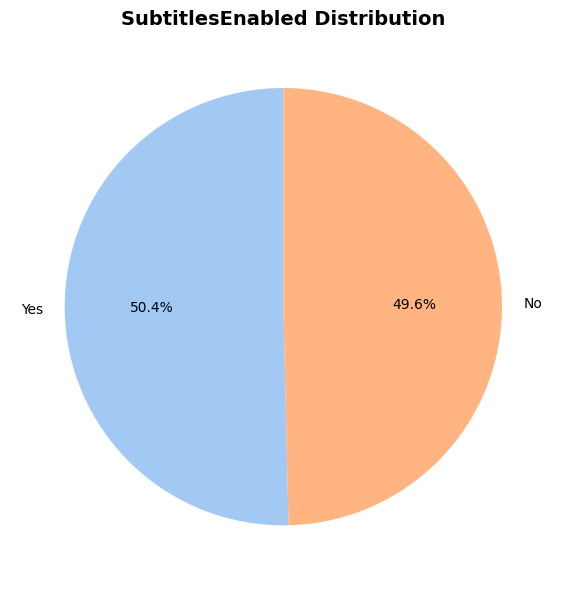

In [22]:
for col in categorical_columns:
    plt.figure(figsize=(6, 6))
    df_train_clean[col].value_counts().plot(
        kind='pie', autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("pastel"))
    plt.title(f"{col} Distribution", fontsize=14, weight='bold')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    plt.close()

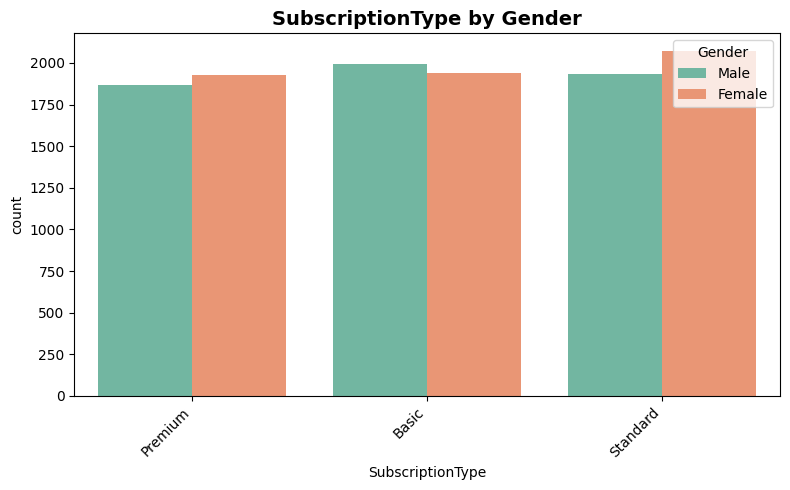

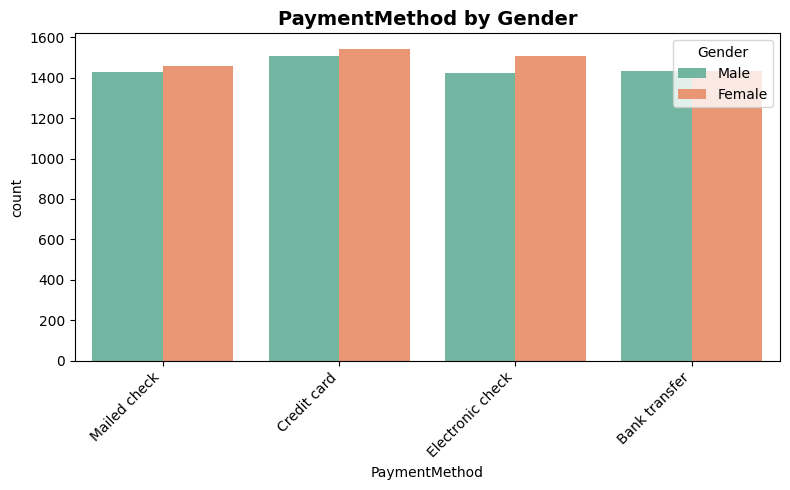

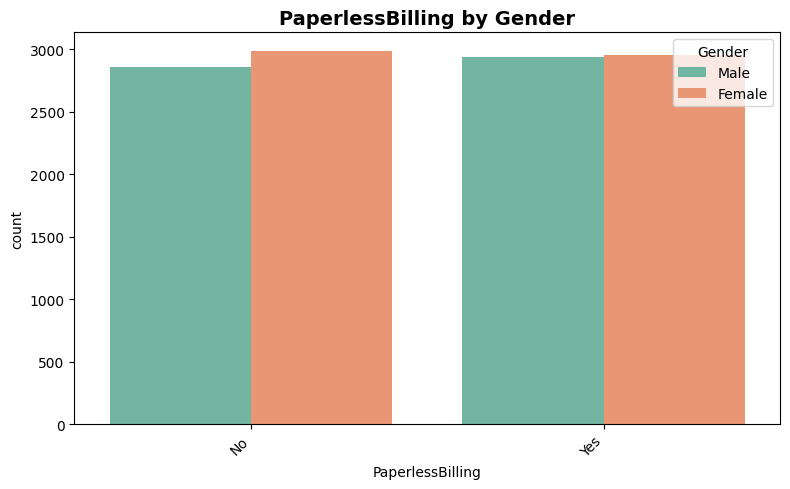

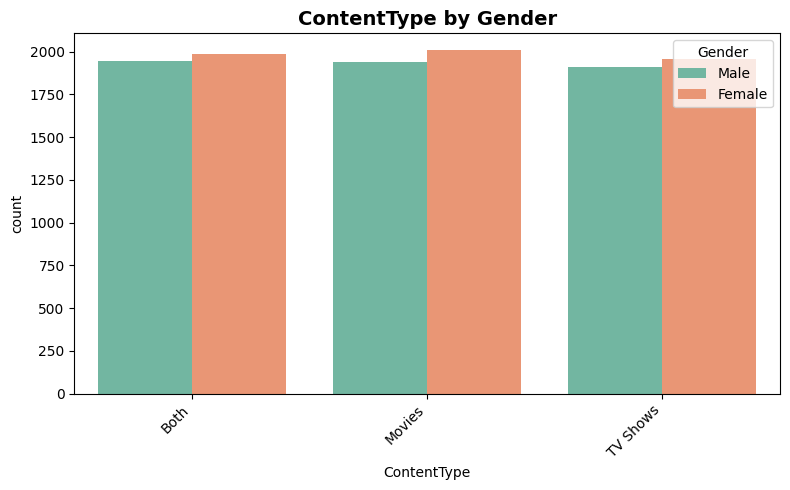

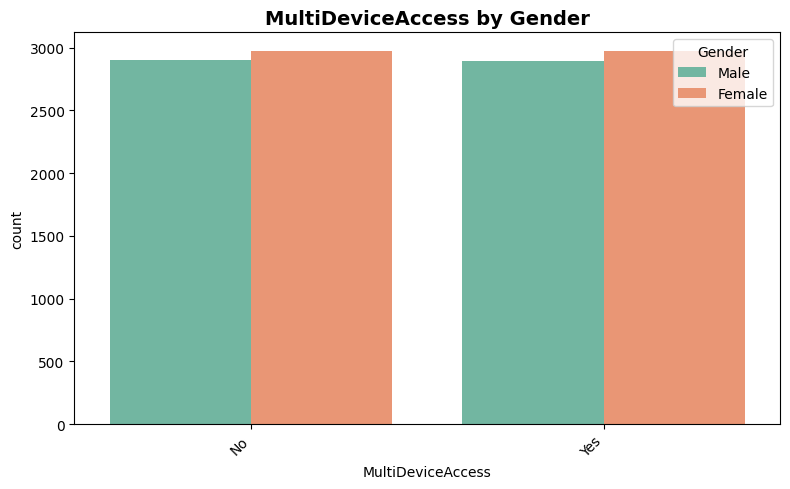

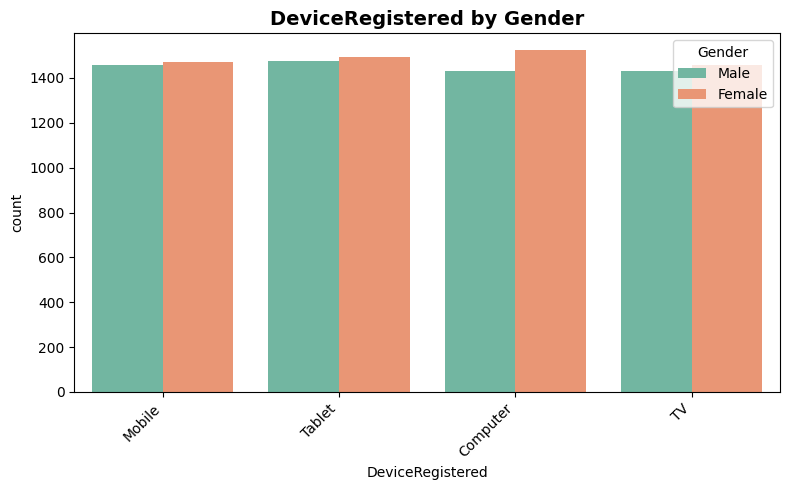

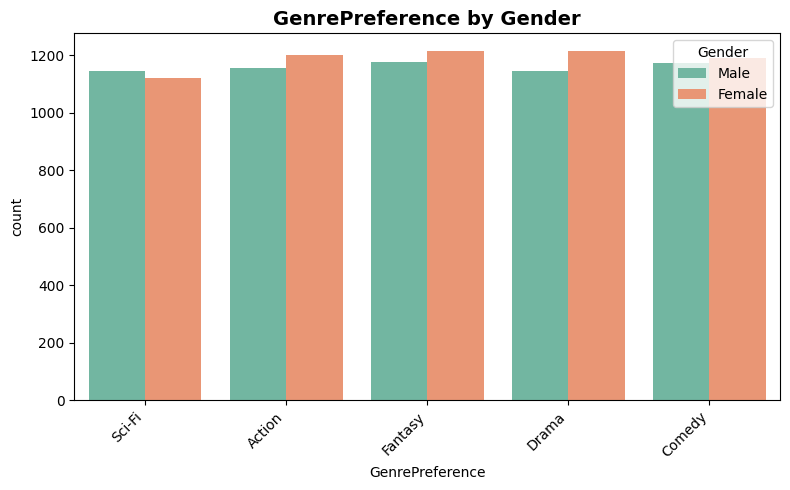

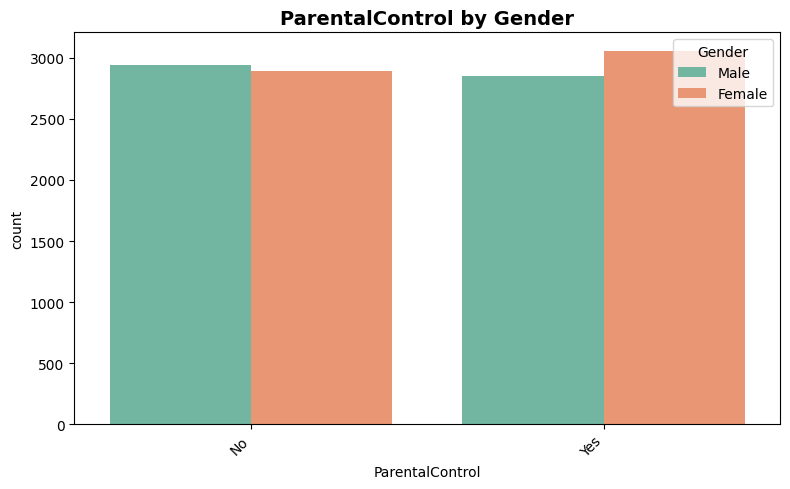

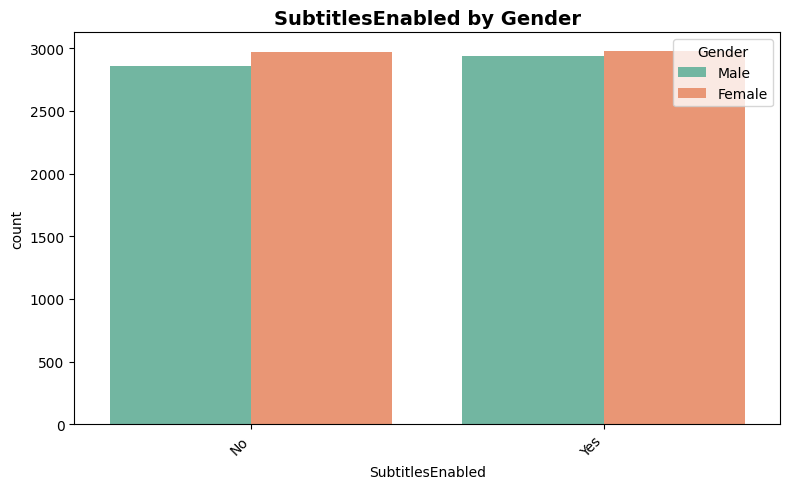

In [23]:
for col in categorical_columns:
    if col != "Gender":  # Avoid plotting Gender vs Gender
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df_train_clean, x=col, hue="Gender", palette="Set2")
        plt.title(f"{col} by Gender", fontsize=14, weight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        #plt.savefig(f"grouped_bars/{col}_by_gender.png", dpi=300)
        plt.show()
        plt.close()

In [25]:
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        col1, col2 = categorical_columns[i], categorical_columns[j]
        cross_tab = pd.crosstab(df_train_clean[col1], df_train_clean[col2])
        plt.figure(figsize=(8, 6))
        sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
        plt.title(f"Heatmap: {col1} vs {col2}", fontsize=14, weight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        #plt.savefig(f"heatmaps/{col1}_vs_{col2}.png", dpi=300)
        plt.show()
        plt.close()

Output hidden; open in https://colab.research.google.com to view.

### Observations

- **Distribution Across Categories:**  
  - Most categorical features show a **nearly uniform distribution** across their respective categories.

- **Gender-wise Analysis:**  
  - Data distribution is **comparable between male and female groups**, indicating no significant imbalance.

---